<a href="https://colab.research.google.com/github/denbonte/IDC-Tutorials/blob/colab-r/notebooks/LIDC_viz_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using IDC Metadata from Colab/R

## Environment Setup

Install dependencies.

The most important one will be `bigrquery`, which we'll use to handle BigQuery natively in R.

In [ ]:
dependencies = c(
  "bigrquery",
  "ggthemes",
  "ggbeeswarm",
  "plyr"
)

In [ ]:
install.packages(dependencies)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import all of the dependencies we might need to clean dataframes, for visualization purposes, and so on.

In [ ]:
library("plyr")
library("dplyr")
library("tidyr")

library("ggplot2")
library("ggthemes")
library("ggbeeswarm")

library("RColorBrewer")

library("bigrquery")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Set options for plotting (plot height and width).

In [ ]:
options(repr.plot.width  = 20,
        repr.plot.height = 12)

## Run `bigrquery`

We can test `bigrquery` and its functionalities by parsing some of the data accompanying the LIDC collection on IDC.

More details (and a tutorial on how to run similar analyses using Python!) can be found in the [LIDC_exploration tutorial notebook](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/LIDC_exploration.ipynb).

In [ ]:
billing <- "idc-sandbox-000" # replace this with your project ID
sql <- "
  SELECT
    collection_id,
    all_attributes.PatientID,
    all_attributes.SeriesDescription,
    trackingIdentifier,
    trackingUniqueIdentifier,
    Quantity.CodeMeaning as Quantity,
    'Units.CodeMeaning' as Units,
    Value,
    all_attributes.StudyInstanceUID,
    all_attributes.SOPInstanceUID,
    all_attributes.Source_DOI
  FROM
    `bigquery-public-data.idc_current.quantitative_measurements` AS measurements_attributes
  JOIN
    `bigquery-public-data.idc_current.dicom_all` AS all_attributes
  ON
    measurements_attributes.SOPInstanceUID = all_attributes.SOPInstanceUID
  WHERE
    Source_DOI = '10.7937/TCIA.2018.h7umfurq'
"

This will require the user to authenticate upon first run!

In [ ]:
tb <- bq_project_query(billing, sql)
df <- bq_table_download(tb)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 2


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=a1c0315fbc45a0cc77f16c9395d21277&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVpFT3ZoVTBPU0Z5TGVfWE1QUXQ4TEdFUU5SQk5fRFZrTU1uaU9waTBqN2hBNWU5WHFuaGVsTk5pTnhHVmRsaDRxVXZXQSIsInN0YXRlIjoiYTFjMDMxNWZiYzQ1YTBjYzc3ZjE2YzkzOTVkMjEyNzcifQ==


In [ ]:
head(df, 10)

collection_id,PatientID,SeriesDescription,trackingIdentifier,trackingUniqueIdentifier,Quantity,Units,Value,StudyInstanceUID,SOPInstanceUID,Source_DOI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
lidc_idri,LIDC-IDRI-0112,Nodule 1 - Annotation MI014_13955 evaluations,Nodule 1,2.25.21847376664392945858781471511421250661734137807263855027416,Diameter,Units.CodeMeaning,15.86322,1.3.6.1.4.1.14519.5.2.1.6279.6001.212995606100714447928555271551,1.2.276.0.7230010.3.1.4.0.6972.1553291070.518671,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0112,Nodule 1 - Annotation MI014_13955 evaluations,Nodule 1,2.25.21847376664392945858781471511421250661734137807263855027416,Volume,Units.CodeMeaning,1007.30900,1.3.6.1.4.1.14519.5.2.1.6279.6001.212995606100714447928555271551,1.2.276.0.7230010.3.1.4.0.6972.1553291070.518671,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0112,Nodule 1 - Annotation MI014_13955 evaluations,Nodule 1,2.25.21847376664392945858781471511421250661734137807263855027416,Surface area of mesh,Units.CodeMeaning,601.30500,1.3.6.1.4.1.14519.5.2.1.6279.6001.212995606100714447928555271551,1.2.276.0.7230010.3.1.4.0.6972.1553291070.518671,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0236,Nodule 1 - Annotation 171373 evaluations,Nodule 1,2.25.44125082896054897411474186724458270417316735256020650188676,Diameter,Units.CodeMeaning,7.28869,1.3.6.1.4.1.14519.5.2.1.6279.6001.305011216002720504189976406136,1.2.276.0.7230010.3.1.4.0.15362.1553298101.919576,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0236,Nodule 1 - Annotation 171373 evaluations,Nodule 1,2.25.44125082896054897411474186724458270417316735256020650188676,Volume,Units.CodeMeaning,218.26170,1.3.6.1.4.1.14519.5.2.1.6279.6001.305011216002720504189976406136,1.2.276.0.7230010.3.1.4.0.15362.1553298101.919576,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0236,Nodule 1 - Annotation 171373 evaluations,Nodule 1,2.25.44125082896054897411474186724458270417316735256020650188676,Surface area of mesh,Units.CodeMeaning,184.91410,1.3.6.1.4.1.14519.5.2.1.6279.6001.305011216002720504189976406136,1.2.276.0.7230010.3.1.4.0.15362.1553298101.919576,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0398,Nodule 4 - Annotation 56662 evaluations,Nodule 4,2.25.28434668784247829018670776432019187411754854320297043997898,Surface area of mesh,Units.CodeMeaning,234.45130,1.3.6.1.4.1.14519.5.2.1.6279.6001.186309477398566417518475261664,1.2.276.0.7230010.3.1.4.0.24808.1553307948.998324,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0398,Nodule 4 - Annotation 56662 evaluations,Nodule 4,2.25.28434668784247829018670776432019187411754854320297043997898,Volume,Units.CodeMeaning,167.54150,1.3.6.1.4.1.14519.5.2.1.6279.6001.186309477398566417518475261664,1.2.276.0.7230010.3.1.4.0.24808.1553307948.998324,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0398,Nodule 4 - Annotation 56662 evaluations,Nodule 4,2.25.28434668784247829018670776432019187411754854320297043997898,Diameter,Units.CodeMeaning,7.69442,1.3.6.1.4.1.14519.5.2.1.6279.6001.186309477398566417518475261664,1.2.276.0.7230010.3.1.4.0.24808.1553307948.998324,10.7937/TCIA.2018.h7umfurq


## Data Visualization

As an example, we can plot the volume of the most frequent category of nodules (a variable stored in the `trackingIdentifier` column).

We can start by filtering the dataframe to keep only nodules' volumetric information.

In [ ]:
df_filt <- df[which(df$Quantity == "Volume"), ]
head(df_filt, 10)

collection_id,PatientID,SeriesDescription,trackingIdentifier,trackingUniqueIdentifier,Quantity,Units,Value,StudyInstanceUID,SOPInstanceUID,Source_DOI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
lidc_idri,LIDC-IDRI-0112,Nodule 1 - Annotation MI014_13955 evaluations,Nodule 1,2.25.21847376664392945858781471511421250661734137807263855027416,Volume,Units.CodeMeaning,1007.30900,1.3.6.1.4.1.14519.5.2.1.6279.6001.212995606100714447928555271551,1.2.276.0.7230010.3.1.4.0.6972.1553291070.518671,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0236,Nodule 1 - Annotation 171373 evaluations,Nodule 1,2.25.44125082896054897411474186724458270417316735256020650188676,Volume,Units.CodeMeaning,218.26170,1.3.6.1.4.1.14519.5.2.1.6279.6001.305011216002720504189976406136,1.2.276.0.7230010.3.1.4.0.15362.1553298101.919576,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0398,Nodule 4 - Annotation 56662 evaluations,Nodule 4,2.25.28434668784247829018670776432019187411754854320297043997898,Volume,Units.CodeMeaning,167.54150,1.3.6.1.4.1.14519.5.2.1.6279.6001.186309477398566417518475261664,1.2.276.0.7230010.3.1.4.0.24808.1553307948.998324,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0400,Nodule 3 - Annotation Nodule 003 evaluations,Nodule 3,2.25.28598049514811006124388272151941769334971276826227469084138,Volume,Units.CodeMeaning,114.52010,1.3.6.1.4.1.14519.5.2.1.6279.6001.193241055656414949090207821605,1.2.276.0.7230010.3.1.4.0.24986.1553308167.282039,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0442,Nodule 1 - Annotation 77797 evaluations,Nodule 1,2.25.40152891066557493055168937297266665786853794548634583471418,Volume,Units.CodeMeaning,114.57150,1.3.6.1.4.1.14519.5.2.1.6279.6001.193438875802960011844317570223,1.2.276.0.7230010.3.1.4.0.28504.1553311953.892228,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0480,Nodule 1 - Annotation 37568 evaluations,Nodule 1,2.25.37460181376626505365254761694736499025749255877112223460446,Volume,Units.CodeMeaning,193.14850,1.3.6.1.4.1.14519.5.2.1.6279.6001.167583044843097027161721296977,1.2.276.0.7230010.3.1.4.0.31778.1553315551.522451,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0541,Nodule 2 - Annotation 14376 evaluations,Nodule 2,2.25.59215287162413831316393548634785003029482416026344623468982,Volume,Units.CodeMeaning,183.61760,1.3.6.1.4.1.14519.5.2.1.6279.6001.103418693958392288272205189260,1.2.276.0.7230010.3.1.4.0.36132.1553320237.498830,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0806,Nodule 5 - Annotation Nodule 006 evaluations,Nodule 5,2.25.83730219129227959473310810471709051982399912340487397190779,Volume,Units.CodeMeaning,187.55360,1.3.6.1.4.1.14519.5.2.1.6279.6001.213690221459882536855619399918,1.2.276.0.7230010.3.1.4.0.55764.1553341531.24958,10.7937/TCIA.2018.h7umfurq
lidc_idri,LIDC-IDRI-0869,Nodule 3 - Annotation 2 evaluations,Nodule 3,2.25.11341906024850593272054771709512429060943344183788679383639,Volume,Units.CodeMeaning,1161.50600,1.3.6.1.4.1.14519.5.2.1.6279.6001.250118712805848631355370259962,1.2.276.0.7230010.3.1.4.0.61122.1553347507.207160,10.7937/TCIA.2018.h7umfurq


In [ ]:
unique(df_filt$trackingIdentifier)
num_nodules = length(unique(df_filt$trackingIdentifier))

[1] "Nodule 1"  "Nodule 4"  "Nodule 3"  "Nodule 2"  "Nodule 5"  "Nodule 6" 
 [7] "Nodule 10" "Nodule 7"  "Nodule 11" "Nodule 15" "Nodule 14" "Nodule 8" 
[13] "Nodule 9"  "Nodule 19" "Nodule 16" "Nodule 12" "Nodule 20" "Nodule 13"
[19] "Nodule 17" "Nodule 23" "Nodule 21" "Nodule 18" "Nodule 22"

For ease of visualization, we can filter the NAs in the `trackingIdentifier` column, reduce that to a factor, sort it, and keep only the `trackingIdentifier` classes with more than 100 entries in the dataframe.

In [ ]:
# Specify the levels of the trackingIdentifier factor
levels_order <- paste("Nodule", 1:num_nodules)

df_filt <- df_filt[!is.na(df_filt$trackingIdentifier), ]

# Keep only trackingIdentifier (nodules) with 100 entries (for visualization purposes)
df_filt <- df_filt %>%
  dplyr::group_by(trackingIdentifier) %>%
  dplyr::filter(dplyr::n() >= 100)

# Convert "trackingIdentifier" to a factor and specify the levels manually
df_filt$trackingIdentifier <- factor(df_filt$trackingIdentifier, levels = levels_order)

num_nodules_filt = length(unique(df_filt$trackingIdentifier))

We can define our custom (beautiful!) theme here as follows:

In [ ]:
font <- "Times New Roman"

gtheme <- theme(
  plot.title = element_text(size = 18, hjust = 0.5, family = font,
                            margin = unit(c(4, 0, 4, 0), "mm")),

  axis.title.x = element_text(size = 16, family = font,
                              margin = unit(c(4, 0, 0, 0), "mm")),

  axis.text.x = element_text(size = 14, family = font,
                             margin = unit(c(4, 0, 0, 0), "mm")),

  axis.title.y = element_text(size = 16, family = font,
                              margin = unit(c(0, 4, 0, 0), "mm")),

  axis.text.y = element_text(size = 14, family = font,
                             margin = unit(c(0, 4, 0, 0), "mm")),

  panel.background = element_rect(colour = "black", size = 1),
  panel.grid.major = element_line(colour = "black", size = .1),
  panel.grid.major.x = element_blank(),
  panel.grid.minor = element_line(colour = "black", size = .1),
  plot.margin = unit(c(6, 6, 6, 6), "mm"),
)

color_palette <- brewer.pal(num_nodules_filt, "Set1")  # Change "Set1" to any other palette name to get different colors

And finally, visualize the nodule volumes distribution using boxplots and swarmplots.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Warning message:
“Removed 668 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 668 rows containing missing values (`geom_point()`).”


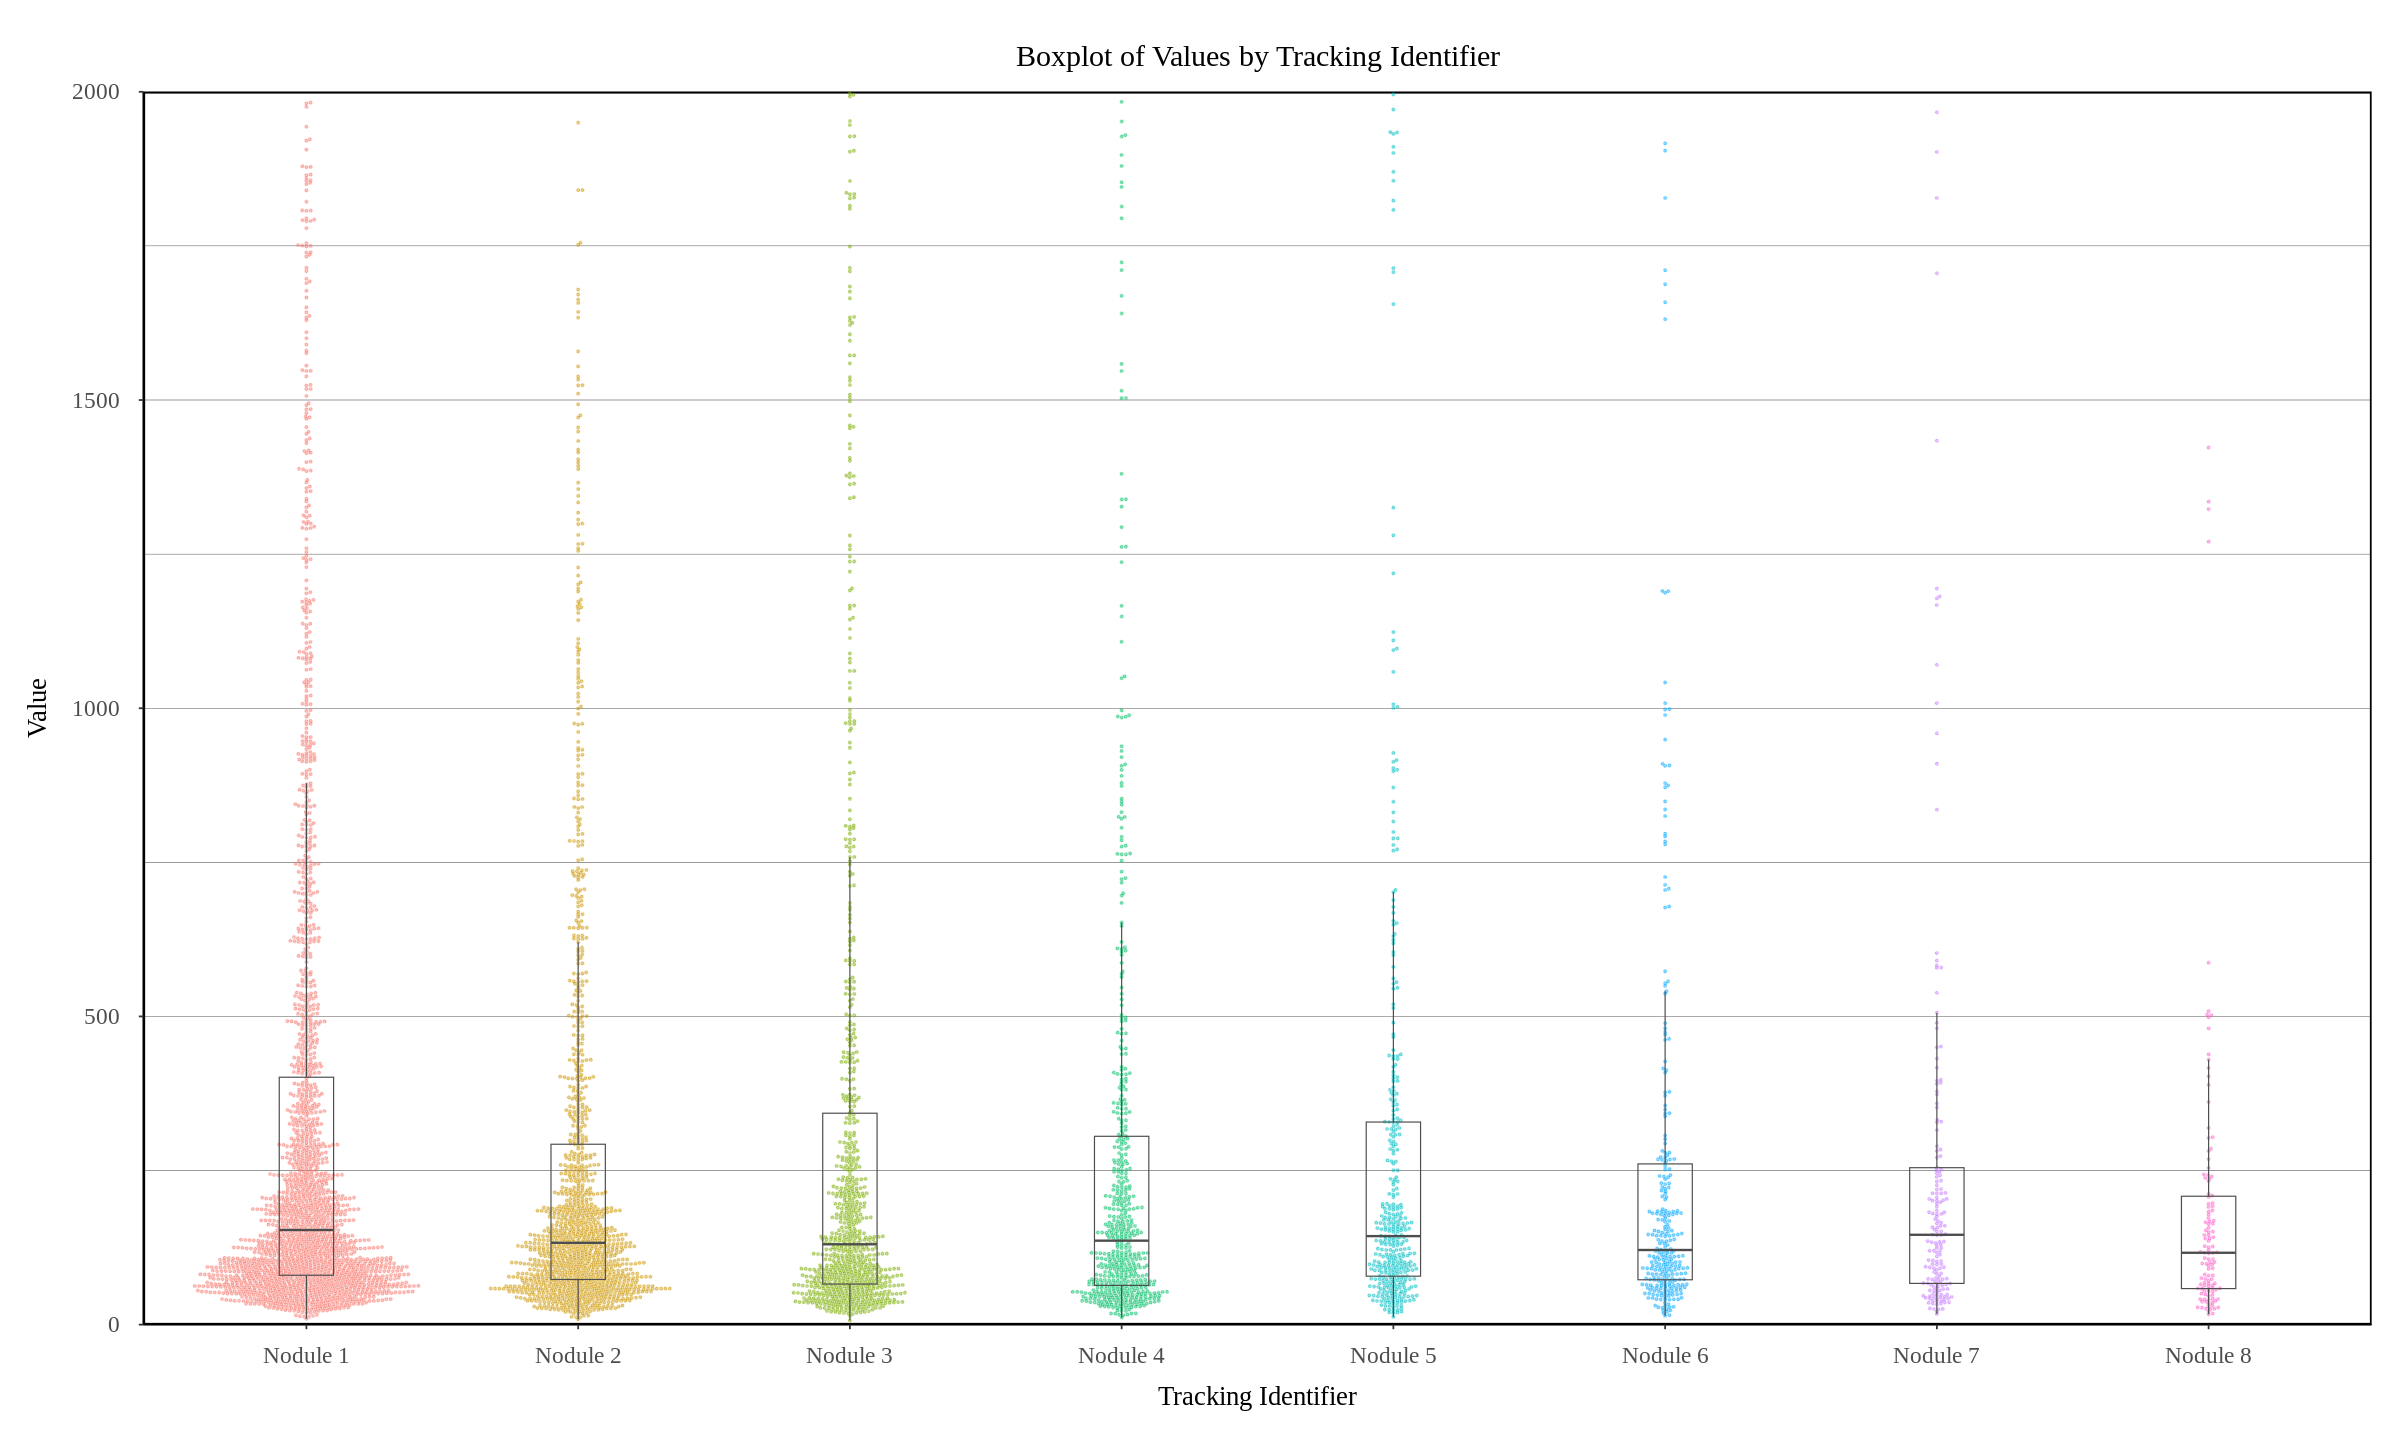

In [ ]:
ggplot(df_filt, aes(x=trackingIdentifier, y=Value, fill=trackingIdentifier, col=trackingIdentifier)) +
  geom_beeswarm(size = 1/2, alpha = 4/10, cex = 1/5) +
  geom_boxplot(aes(x=as.numeric(trackingIdentifier), y=Value, group = trackingIdentifier),
               notch = FALSE, size = 1/3, alpha = 1, colour = "grey30",
               fill = NA, outlier.shape = NA, width = 1/5, notchwidth = 1/5) +
  labs(x="Tracking Identifier", y="Value", title="Boxplot of Values by Tracking Identifier") +
  theme_classic() +
  gtheme +
  guides(fill = FALSE, col = FALSE) +
  scale_fill_manual(values = color_palette) +
  # cap to 2000 for visualization purposes
  scale_y_continuous(
    minor_breaks = seq(0, 2000, 250),
    expand = expansion(mult = c(0.0, 0.0)),
    limits = c(0, 2000)
    )